In [1]:
import numpy as np
import CcaGrid

In [2]:
NEIGHBORHOOD_MOORE = 0
NEIGHBORHOOD_NEUMANN = 1

num_columns = 10
num_rows = 10

# 313 rule
num_states = 3
neighborhood_range = 1
neighboorhood_type = NEIGHBORHOOD_MOORE
threshold = 3

### Create states

create array of 100 states

In [3]:
def randomStates(rows, columns, states):
    grid = np.random.rand(num_rows*num_columns) * (states-1)
    grid = grid.round().astype(np.uint8)
    return grid

In [4]:
grid = randomStates(num_rows, num_columns, num_states)

In [5]:
grid.reshape(10, 10)

array([[1, 0, 1, 0, 0, 1, 1, 0, 1, 1],
       [0, 0, 2, 0, 2, 1, 2, 2, 1, 0],
       [1, 0, 1, 0, 2, 1, 2, 1, 1, 0],
       [0, 2, 0, 2, 2, 2, 0, 2, 1, 0],
       [1, 2, 2, 0, 2, 2, 0, 0, 0, 1],
       [2, 1, 1, 1, 1, 2, 2, 1, 2, 1],
       [0, 2, 0, 2, 0, 1, 1, 1, 1, 1],
       [1, 1, 2, 0, 0, 1, 0, 1, 0, 1],
       [0, 1, 0, 2, 2, 1, 2, 1, 0, 1],
       [1, 1, 0, 1, 2, 1, 0, 0, 1, 1]], dtype=uint8)

### Create positions

In [6]:
def positions(rows, columns):
    return np.asarray(list(range(0, num_rows*num_columns)), np.uint16)

In [7]:
positions = positions(num_rows, num_columns)

In [8]:
positions.reshape(10, 10)

array([[ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9],
       [10, 11, 12, 13, 14, 15, 16, 17, 18, 19],
       [20, 21, 22, 23, 24, 25, 26, 27, 28, 29],
       [30, 31, 32, 33, 34, 35, 36, 37, 38, 39],
       [40, 41, 42, 43, 44, 45, 46, 47, 48, 49],
       [50, 51, 52, 53, 54, 55, 56, 57, 58, 59],
       [60, 61, 62, 63, 64, 65, 66, 67, 68, 69],
       [70, 71, 72, 73, 74, 75, 76, 77, 78, 79],
       [80, 81, 82, 83, 84, 85, 86, 87, 88, 89],
       [90, 91, 92, 93, 94, 95, 96, 97, 98, 99]], dtype=uint16)

### Get number of neighboring cells

In [9]:
def moore_neighborhood_size(size):
    return ((2*size) + 1) ** 2 - 1

### Get position from coordinate

In [10]:
def coordinate_to_position(coordinate, total_cols):
    return (coordinate[0]*total_cols) + coordinate[1]

In [11]:
coordinate_to_position((4,4), 10)

44

### Get coordinate from position

In [12]:
def position_to_coordinate(position, total_cols):
    return (int(position/total_cols)//1, position%total_cols)

In [13]:
position_to_coordinate(44, 10)

(4, 4)

### Create Moore neighborhood

** For cell (4, 4) **

In [14]:
current_row = 4
current_column = 4

In [15]:
def wrap_coordinate(coordinate, num_rows, num_columns):
    return (coordinate[0] % num_rows, coordinate[1] % num_columns)

In [16]:
def wrap_state(state, num_states):
    return (state % num_states)

**Rewrite to array?**

In [17]:
def moore_neighborhood_positions(row, column, size, num_rows, num_columns):
    coordinates = []
    for row_offset in range(-size, size+1):
        for column_offset in range(-size, size+1):
            if (row_offset != 0) | (column_offset != 0):
                coordinates.append((row+row_offset, column+column_offset))
            
    return np.asarray(
        list(coordinate_to_position(wrap_coordinate(x, num_rows, num_columns), num_columns) for x in coordinates),
        np.uint16
    )

In [18]:
neighborhood_positions = moore_neighborhood_positions(current_row, current_column, 1, num_rows, num_columns)

In [19]:
neighborhood_positions

array([33, 34, 35, 43, 45, 53, 54, 55], dtype=uint16)

### Create neighborhood mask

In [20]:
def neighborhood_mask(neighborhood_positions, positions):
    return np.asarray(
        list(x not in neighborhood_positions for x in positions),
        np.bool
    )

In [21]:
neighbor_grid = neighborhood_mask(neighborhood_positions, positions)

In [22]:
neighbor_grid.reshape(10, 10)

array([[ True,  True,  True,  True,  True,  True,  True,  True,  True,
         True],
       [ True,  True,  True,  True,  True,  True,  True,  True,  True,
         True],
       [ True,  True,  True,  True,  True,  True,  True,  True,  True,
         True],
       [ True,  True,  True, False, False, False,  True,  True,  True,
         True],
       [ True,  True,  True, False,  True, False,  True,  True,  True,
         True],
       [ True,  True,  True, False, False, False,  True,  True,  True,
         True],
       [ True,  True,  True,  True,  True,  True,  True,  True,  True,
         True],
       [ True,  True,  True,  True,  True,  True,  True,  True,  True,
         True],
       [ True,  True,  True,  True,  True,  True,  True,  True,  True,
         True],
       [ True,  True,  True,  True,  True,  True,  True,  True,  True,
         True]])

### Use mask to query neighborhood

In [23]:
neighbor_states = np.ma.masked_array(grid, neighbor_grid)

In [24]:
neighbor_states.reshape(10, 10)

masked_array(
  data=[[--, --, --, --, --, --, --, --, --, --],
        [--, --, --, --, --, --, --, --, --, --],
        [--, --, --, --, --, --, --, --, --, --],
        [--, --, --, 2, 2, 2, --, --, --, --],
        [--, --, --, 0, --, 2, --, --, --, --],
        [--, --, --, 1, 1, 2, --, --, --, --],
        [--, --, --, --, --, --, --, --, --, --],
        [--, --, --, --, --, --, --, --, --, --],
        [--, --, --, --, --, --, --, --, --, --],
        [--, --, --, --, --, --, --, --, --, --]],
  mask=[[ True,  True,  True,  True,  True,  True,  True,  True,  True,
          True],
        [ True,  True,  True,  True,  True,  True,  True,  True,  True,
          True],
        [ True,  True,  True,  True,  True,  True,  True,  True,  True,
          True],
        [ True,  True,  True, False, False, False,  True,  True,  True,
          True],
        [ True,  True,  True, False,  True, False,  True,  True,  True,
          True],
        [ True,  True,  True, False, False, Fals

In [25]:
neighbor_states.compressed()

array([2, 2, 2, 0, 2, 1, 1, 2], dtype=uint8)

In [26]:
(neighbor_states.compressed() == 1).sum()

2

In [27]:
(neighbor_states.compressed() == 2).sum()

5

### Create all neighborhood masks

In [28]:
all_neighborhood_positions = np.empty((num_rows*num_columns, moore_neighborhood_size(1)), np.uint16);
for idx, x in enumerate(positions):
    coordinate = position_to_coordinate(x, num_columns)
    all_neighborhood_positions[idx] = moore_neighborhood_positions(coordinate[0], coordinate[1], 1, num_rows, num_columns)

In [29]:
all_neighborhood_positions[44]

array([33, 34, 35, 43, 45, 53, 54, 55], dtype=uint16)

In [30]:
all_neighborhood_masks = np.empty((num_rows*num_columns, num_rows*num_columns), dtype=np.bool)
for idx, x in enumerate(all_neighborhood_positions):
    all_neighborhood_masks[idx] = neighborhood_mask(x, positions)

In [31]:
all_neighborhood_states = np.ma.empty((num_rows*num_columns, num_rows*num_columns))
for idx, x in enumerate(all_neighborhood_masks):
    all_neighborhood_states[idx] = np.ma.masked_array(grid, x)

In [32]:
all_neighborhood_states[44].reshape(10, 10)

masked_array(
  data=[[--, --, --, --, --, --, --, --, --, --],
        [--, --, --, --, --, --, --, --, --, --],
        [--, --, --, --, --, --, --, --, --, --],
        [--, --, --, 2.0, 2.0, 2.0, --, --, --, --],
        [--, --, --, 0.0, --, 2.0, --, --, --, --],
        [--, --, --, 1.0, 1.0, 2.0, --, --, --, --],
        [--, --, --, --, --, --, --, --, --, --],
        [--, --, --, --, --, --, --, --, --, --],
        [--, --, --, --, --, --, --, --, --, --],
        [--, --, --, --, --, --, --, --, --, --]],
  mask=[[ True,  True,  True,  True,  True,  True,  True,  True,  True,
          True],
        [ True,  True,  True,  True,  True,  True,  True,  True,  True,
          True],
        [ True,  True,  True,  True,  True,  True,  True,  True,  True,
          True],
        [ True,  True,  True, False, False, False,  True,  True,  True,
          True],
        [ True,  True,  True, False,  True, False,  True,  True,  True,
          True],
        [ True,  True,  True, Fa

In [33]:
### Repeatedly update states

In [34]:
def get_next_states(grid, num_states):
    return np.mod((grid+1), num_states)

In [35]:
def count_neighbors_in_next_state(all_neighborhood_states, next_states, positions, num_rows, num_columns):
    neighbors_in_next_state = np.empty((num_columns*num_rows), dtype=np.uint8)
    for idx in positions:
        neighbors_in_next_state[idx] = (all_neighborhood_states[idx].compressed() == next_states[idx]).sum()
    return neighbors_in_next_state

In [36]:
def get_thresholds_that_are_met(neighbors_in_next_state, threshold):
    return (neighbors_in_next_state >= threshold)

In [37]:
def get_next_grid(grid, threshold_is_met, num_states):
    return np.mod(np.add(grid, threshold_is_met), num_states)

In [38]:
next_states = get_next_states(grid, num_states)

In [39]:
next_states.reshape(10, 10)

array([[2, 1, 2, 1, 1, 2, 2, 1, 2, 2],
       [1, 1, 0, 1, 0, 2, 0, 0, 2, 1],
       [2, 1, 2, 1, 0, 2, 0, 2, 2, 1],
       [1, 0, 1, 0, 0, 0, 1, 0, 2, 1],
       [2, 0, 0, 1, 0, 0, 1, 1, 1, 2],
       [0, 2, 2, 2, 2, 0, 0, 2, 0, 2],
       [1, 0, 1, 0, 1, 2, 2, 2, 2, 2],
       [2, 2, 0, 1, 1, 2, 1, 2, 1, 2],
       [1, 2, 1, 0, 0, 2, 0, 2, 1, 2],
       [2, 2, 1, 2, 0, 2, 1, 1, 2, 2]], dtype=uint8)

In [40]:
neighbors_in_next_state = count_neighbors_in_next_state(all_neighborhood_states, next_states, positions, num_rows, num_columns)

In [41]:
neighbors_in_next_state.reshape(10, 10)

array([[0, 4, 1, 2, 4, 3, 2, 4, 1, 0],
       [3, 4, 6, 2, 4, 4, 1, 1, 1, 6],
       [1, 2, 3, 1, 2, 6, 1, 4, 2, 4],
       [3, 3, 1, 3, 2, 2, 2, 4, 1, 5],
       [3, 2, 2, 3, 1, 2, 1, 2, 4, 2],
       [1, 4, 4, 3, 4, 2, 2, 2, 2, 2],
       [6, 2, 4, 4, 4, 2, 2, 2, 1, 2],
       [1, 2, 3, 0, 3, 2, 7, 1, 7, 0],
       [8, 1, 4, 4, 2, 3, 3, 1, 6, 0],
       [0, 0, 4, 3, 2, 3, 5, 4, 0, 0]], dtype=uint8)

In [42]:
threshold_is_met = get_thresholds_that_are_met(neighbors_in_next_state, num_states)

In [43]:
threshold_is_met.reshape(10, 10)

array([[False,  True, False, False,  True,  True, False,  True, False,
        False],
       [ True,  True,  True, False,  True,  True, False, False, False,
         True],
       [False, False,  True, False, False,  True, False,  True, False,
         True],
       [ True,  True, False,  True, False, False, False,  True, False,
         True],
       [ True, False, False,  True, False, False, False, False,  True,
        False],
       [False,  True,  True,  True,  True, False, False, False, False,
        False],
       [ True, False,  True,  True,  True, False, False, False, False,
        False],
       [False, False,  True, False,  True, False,  True, False,  True,
        False],
       [ True, False,  True,  True, False,  True,  True, False,  True,
        False],
       [False, False,  True,  True, False,  True,  True,  True, False,
        False]])

In [44]:
grid = get_next_grid(grid, threshold_is_met, num_states)

In [45]:
grid.reshape(10, 10)

array([[1, 1, 1, 0, 1, 2, 1, 1, 1, 1],
       [1, 1, 0, 0, 0, 2, 2, 2, 1, 1],
       [1, 0, 2, 0, 2, 2, 2, 2, 1, 1],
       [1, 0, 0, 0, 2, 2, 0, 0, 1, 1],
       [2, 2, 2, 1, 2, 2, 0, 0, 1, 1],
       [2, 2, 2, 2, 2, 2, 2, 1, 2, 1],
       [1, 2, 1, 0, 1, 1, 1, 1, 1, 1],
       [1, 1, 0, 0, 1, 1, 1, 1, 1, 1],
       [1, 1, 1, 0, 2, 2, 0, 1, 1, 1],
       [1, 1, 1, 2, 2, 2, 1, 1, 1, 1]], dtype=uint8)

### Create image from grid

In [49]:
from PIL import Image, ImageColor
from matplotlib.pyplot import imshow

%matplotlib inline

In [55]:
colors = [ImageColor.getrgb('#4484CE'), ImageColor.getrgb('#F9CF00'), ImageColor.getrgb('#F19F4D')]

In [56]:
colors

[(68, 132, 206), (249, 207, 0), (241, 159, 77)]

In [60]:
grid_in_colors = np.empty((num_columns*num_rows), dtype=tuple)
for i in positions:
    grid_in_colors[i] = colors[grid[i]]

In [67]:
grid.reshape(10, 10)

array([[1, 1, 1, 0, 1, 2, 1, 1, 1, 1],
       [1, 1, 0, 0, 0, 2, 2, 2, 1, 1],
       [1, 0, 2, 0, 2, 2, 2, 2, 1, 1],
       [1, 0, 0, 0, 2, 2, 0, 0, 1, 1],
       [2, 2, 2, 1, 2, 2, 0, 0, 1, 1],
       [2, 2, 2, 2, 2, 2, 2, 1, 2, 1],
       [1, 2, 1, 0, 1, 1, 1, 1, 1, 1],
       [1, 1, 0, 0, 1, 1, 1, 1, 1, 1],
       [1, 1, 1, 0, 2, 2, 0, 1, 1, 1],
       [1, 1, 1, 2, 2, 2, 1, 1, 1, 1]], dtype=uint8)

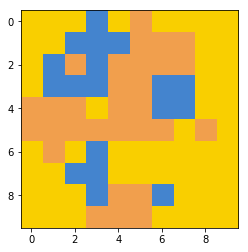

In [66]:
img = Image.new('RGB', (num_columns, num_rows))
img.putdata(grid_in_colors)
imshow(np.asarray(img))

### Next steps
* create image/diagram from array
* iterate over grid and create image of each iteration
* create gif from multiple images